### Import Packages and set globas

In [1]:
import serial
import time
import schedule
#carry_values=[1564.26,453.09,979.11,274.93,495.3,803.31,1564.26,453.09,979.11,274.93,495.3,803.31,1564.26,453.09,979.11,274.93,495.3,803.31]
carry_values=[]

### Port ID

In [2]:
import serial.tools.list_ports

def list_serial_ports():
    ports = serial.tools.list_ports.comports()
    for port in ports:
        print(port)

if __name__ == '__main__':
    list_serial_ports()


COM3 - Standard Serial over Bluetooth link (COM3)
COM4 - Standard Serial over Bluetooth link (COM4)
COM7 - USB Serial Device (COM7)


### Read in the NIR

In [3]:
#Python code for connecting Arduino to Python
#That's Engineering
#29/04/2020
# -----------------------------------main


def main_func():
    global carry_values
    arduino = serial.Serial('COM7', 115200)
    print('Established serial connection to Arduino')
    arduino_data = arduino.readline()
    print(arduino_data)

    decoded_values = str(arduino_data[0:len(arduino_data)].decode("utf-8"))
    list_values = decoded_values.split(',')
    #list_values= list_values[:-1]
    list_values= list_values[:-1]
    list_in_floats=[]
    

    for item in list_values:
        list_in_floats.append(float(item))
        carry_values=list_in_floats

    
    print(f'Collected readings from Arduino: {carry_values}')
    

    arduino_data = 0
    list_in_floats.clear()
    list_values.clear()
    arduino.close()
    print('Connection closed')
    print('<----------------------------->')

# ----------------------------------------Main Code------------------------------------
# Declare variables to be used
list_values = []
list_in_floats = []

start_time = time.time()  # Get the current time

print('Program started')

# Setting up the Arduino
schedule.every(5).seconds.do(main_func)
start_time = time.time()  # Get the current time

while True:
    schedule.run_pending()
    time.sleep(1)
    elapsed_time = time.time() - start_time
    if elapsed_time > 15:  # If more than 1 minute (60 seconds) has passed
        print("graph")
        print(f'Cgraph: {carry_values}')
        break



Program started
Established serial connection to Arduino
b'1806.10,412.90,1136.03,202.36,530.02,901.47,125.74,136.72,623.74,86.66,202.94,28.31,73.67,54.84,127.08,170.84,76.82,33.25\r\n'
Collected readings from Arduino: [1806.1, 412.9, 1136.03, 202.36, 530.02, 901.47, 125.74, 136.72, 623.74, 86.66, 202.94, 28.31, 73.67, 54.84, 127.08, 170.84, 76.82]
Connection closed
<----------------------------->
Established serial connection to Arduino
b'1870.13,429.37,1188.99,206.56,549.68,917.75,125.74,136.72,612.30,86.66,192.42,27.91,73.67,54.01,125.35,166.25,79.42,34.17\r\n'
Collected readings from Arduino: [1870.13, 429.37, 1188.99, 206.56, 549.68, 917.75, 125.74, 136.72, 612.3, 86.66, 192.42, 27.91, 73.67, 54.01, 125.35, 166.25, 79.42]
Connection closed
<----------------------------->
graph
Cgraph: []


###  Graph the results

[]
[]


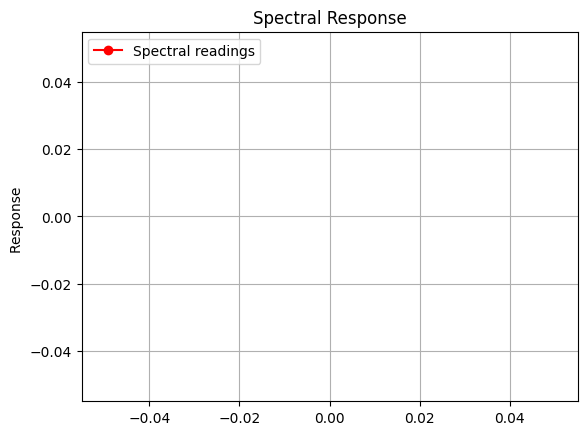

In [4]:
import numpy   as np
import matplotlib.pyplot as plt  
from drawnow import *  
from scipy.interpolate import interp1d
print(carry_values)
#spectreReadings= [1564.26,453.09,979.11,274.93,495.3,803.31,1564.26,453.09,979.11,274.93,495.3,803.31,1564.26,453.09,979.11,274.93,495.3,803.31]
spectreReadings=carry_values
print(spectreReadings)

#fig.canvas.mpl_connect('close_event', handle_close) # figured out finally how to close the "groundhog" window
#plt.ylim(0,defaultYLimit)                            
plt.title('Spectral Response')           
plt.grid(True)                              
plt.ylabel('Response ')                          
plt.plot(spectreReadings, 'ro-', label='Spectral readings')       
#plt.plot(x, spectreReadings, 'o', xnew, f(xnew), '-')       
plt.legend(loc='upper left')           
	 